In [27]:
import tensorflow.keras.datasets as ds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [28]:
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


/tmp/ipykernel_40708/2430190313.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


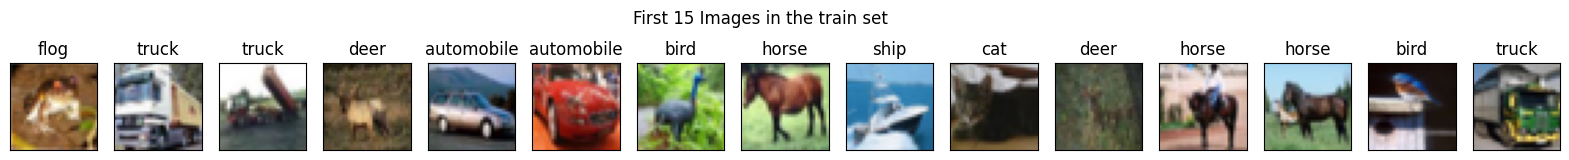

In [29]:
x_train = x_train.astype('float32'); x_train /= 255.0
print(x_train[0])
x_train = x_train[0:15,];y_train = y_train[0:15,] # 15개만 증강 적용
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'flog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20,2))
plt.suptitle('First 15 Images in the train set')
for i in range(15) :
    plt.subplot(1,15,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]) ; plt.yticks([])
    plt.title(class_names[int(y_train[i])])
plt.show()

In [30]:
batch_siz=4 # 한번에 생성하는 양
generator = ImageDataGenerator(rotation_range=20.0, 
                               width_shift_range=0.2, 
                               height_shift_range=0.2, 
                               horizontal_flip=batch_siz)
gen = generator.flow(x_train, y_train, batch_size=batch_siz) # 이미지를 ImageGenerator의 파라미터에 맞춰 증강생성

In [31]:
gen

In [32]:
# !pip install scipy

/tmp/ipykernel_40708/3818036228.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(label[i])])


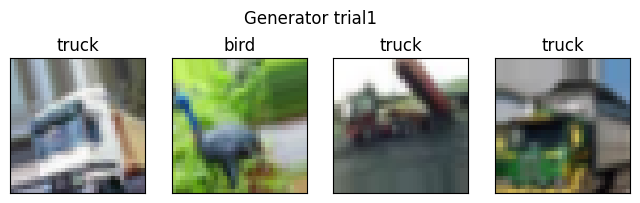

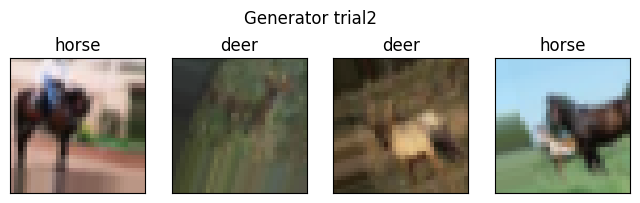

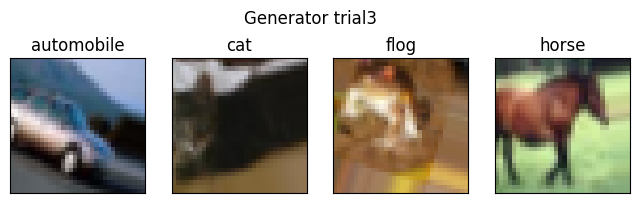

In [33]:
for a in range(3) :
    img, label = next(gen)
    plt.figure(figsize=(8,2.4))
    plt.suptitle("Generator trial" + str(a+1))
    for i in range(batch_siz):
        plt.subplot(1,batch_siz,i+1)
        plt.imshow(img[i])
        plt.xticks([]) ; plt.yticks([])
        plt.title(class_names[int(label[i])])
plt.show()